### How to access DOORS cubes based on model data by PML

This notebook serves to explain how to access data cubes that have been created based on model data provided by PML for the Black Sea region. The cubes are accessed using the xcube package. To access the data, the first step is to set up a store that establishes the connection to the s3 bucket hosting the data.

In [1]:
from xcube.core.store import new_data_store

In [2]:
pml_model_store = new_data_store(
    "s3",
    root="doors-cubes/model-data/PML",
    max_depth=1
)

Next, we can list the data cubes that are stored in this bucket. 

In [3]:
list(pml_model_store.get_data_ids())

['c_gls_LWQ300_black_OLCI_V1.4.0_owt.levels']

We can get a description of the data and open the dataset.

In [4]:
pml_model_store.describe_data('c_gls_LWQ300_black_OLCI_V1.4.0_owt.levels')

/home/tonio-bc/projects/dcs4cop/xcube/xcube/core/timecoord.py:145: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  attr_start_time = pd.to_datetime(attr_start_time, infer_datetime_format=False, utc=True)
/home/tonio-bc/projects/dcs4cop/xcube/xcube/core/timecoord.py:146: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  attr_end_time = pd.to_datetime(attr_end_time, infer_datetime_format=False, utc=True)


In [5]:
ds_owt = pml_model_store.open_data('c_gls_LWQ300_black_OLCI_V1.4.0_owt.levels')
ds_owt

For purposes of better visualisation, the data is provided as a MultiLevelDataset. We may access the underlying dataset like this:

In [6]:
display(ds_owt.base_dataset)

<xarray.Dataset>
Dimensions:       (time: 1930, lat: 3584, lon: 6944)
Coordinates:
  * lat           (lat) float64 48.0 48.0 47.99 47.99 ... 40.01 40.01 40.0 40.0
  * lon           (lon) float64 26.5 26.5 26.51 26.51 ... 41.99 41.99 42.0 42.0
  * time          (time) datetime64[ns] 2016-04-26T07:58:07.500000 ... 2021-0...
Data variables: (12/19)
    OWT_1         (time, lat, lon) float32 dask.array<chunksize=(10, 512, 434), meta=np.ndarray>
    OWT_10        (time, lat, lon) float32 dask.array<chunksize=(10, 512, 434), meta=np.ndarray>
    OWT_11        (time, lat, lon) float32 dask.array<chunksize=(10, 512, 434), meta=np.ndarray>
    OWT_12        (time, lat, lon) float32 dask.array<chunksize=(10, 512, 434), meta=np.ndarray>
    OWT_13        (time, lat, lon) float32 dask.array<chunksize=(10, 512, 434), meta=np.ndarray>
    OWT_14        (time, lat, lon) float32 dask.array<chunksize=(10, 512, 434), meta=np.ndarray>
    ...            ...
    OWT_5         (time, lat, lon) float32 dask.array<chunksize=(10, 512, 434), meta=np.ndarray>
    OWT_6         (time, lat, lon) float32 dask.array<chunksize=(10, 512, 434), meta=np.ndarray>
    OWT_7         (time, lat, lon) float32 dask.array<chunksize=(10, 512, 434), meta=np.ndarray>
    OWT_8         (time, lat, lon) float32 dask.array<chunksize=(10, 512, 434), meta=np.ndarray>
    OWT_9         (time, lat, lon) float32 dask.array<chunksize=(10, 512, 434), meta=np.ndarray>
    dominant_OWT  (time, lat, lon) float32 dask.array<chunksize=(10, 512, 434), meta=np.ndarray>
Attributes: (12/41)
    Conventions:                CF-1.4
    TileSize:                   64:64
    acknowledgment:             DOORS project
    aggregation_period:         1D
    comment:                    
    contact:                    liat@pml.ac.uk
    ...                         ...
    sensor:                     OLCI
    software_version:           1.4
    time_coverage_end:          2021-08-10T07:30:00
    time_coverage_start:        2021-08-01T07:04:41
    title:                      DOORS PML OWT, DOORS preliminary product; Wat...
    trackingID:                 b621b21c-755f-4984-bc1a-ea10c296c5ad

We may also get images at a lower level, which is quicker for, e.g., visualisation.

In [7]:
ds_owt.get_dataset(3)

<xarray.Dataset>
Dimensions:       (time: 1930, lat: 448, lon: 868)
Coordinates:
  * lat           (lat) float64 47.98 47.97 47.95 47.93 ... 40.04 40.02 40.0
  * lon           (lon) float64 26.5 26.52 26.54 26.55 ... 41.95 41.97 41.98
  * time          (time) datetime64[ns] 2016-04-26T07:58:07.500000 ... 2021-0...
Data variables: (12/19)
    OWT_1         (time, lat, lon) float32 dask.array<chunksize=(10, 448, 434), meta=np.ndarray>
    OWT_10        (time, lat, lon) float32 dask.array<chunksize=(10, 448, 434), meta=np.ndarray>
    OWT_11        (time, lat, lon) float32 dask.array<chunksize=(10, 448, 434), meta=np.ndarray>
    OWT_12        (time, lat, lon) float32 dask.array<chunksize=(10, 448, 434), meta=np.ndarray>
    OWT_13        (time, lat, lon) float32 dask.array<chunksize=(10, 448, 434), meta=np.ndarray>
    OWT_14        (time, lat, lon) float32 dask.array<chunksize=(10, 448, 434), meta=np.ndarray>
    ...            ...
    OWT_5         (time, lat, lon) float32 dask.array<chunksize=(10, 448, 434), meta=np.ndarray>
    OWT_6         (time, lat, lon) float32 dask.array<chunksize=(10, 448, 434), meta=np.ndarray>
    OWT_7         (time, lat, lon) float32 dask.array<chunksize=(10, 448, 434), meta=np.ndarray>
    OWT_8         (time, lat, lon) float32 dask.array<chunksize=(10, 448, 434), meta=np.ndarray>
    OWT_9         (time, lat, lon) float32 dask.array<chunksize=(10, 448, 434), meta=np.ndarray>
    dominant_OWT  (time, lat, lon) float32 dask.array<chunksize=(10, 448, 434), meta=np.ndarray>
Attributes: (12/41)
    Conventions:                CF-1.4
    TileSize:                   64:64
    acknowledgment:             DOORS project
    aggregation_period:         1D
    comment:                    
    contact:                    liat@pml.ac.uk
    ...                         ...
    sensor:                     OLCI
    software_version:           1.4
    time_coverage_end:          2021-08-10T07:30:00
    time_coverage_start:        2021-08-01T07:04:41
    title:                      DOORS PML OWT, DOORS preliminary product; Wat...
    trackingID:                 b621b21c-755f-4984-bc1a-ea10c296c5ad

We can then visualise a single image ...

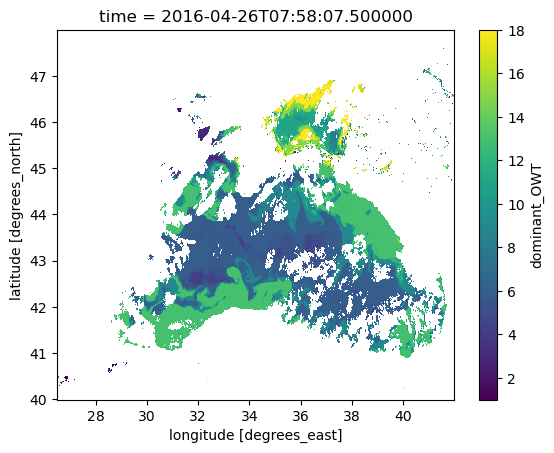

In [8]:
ds_owt.get_dataset(3).dominant_OWT.isel(time=0).plot()

... or a time series.

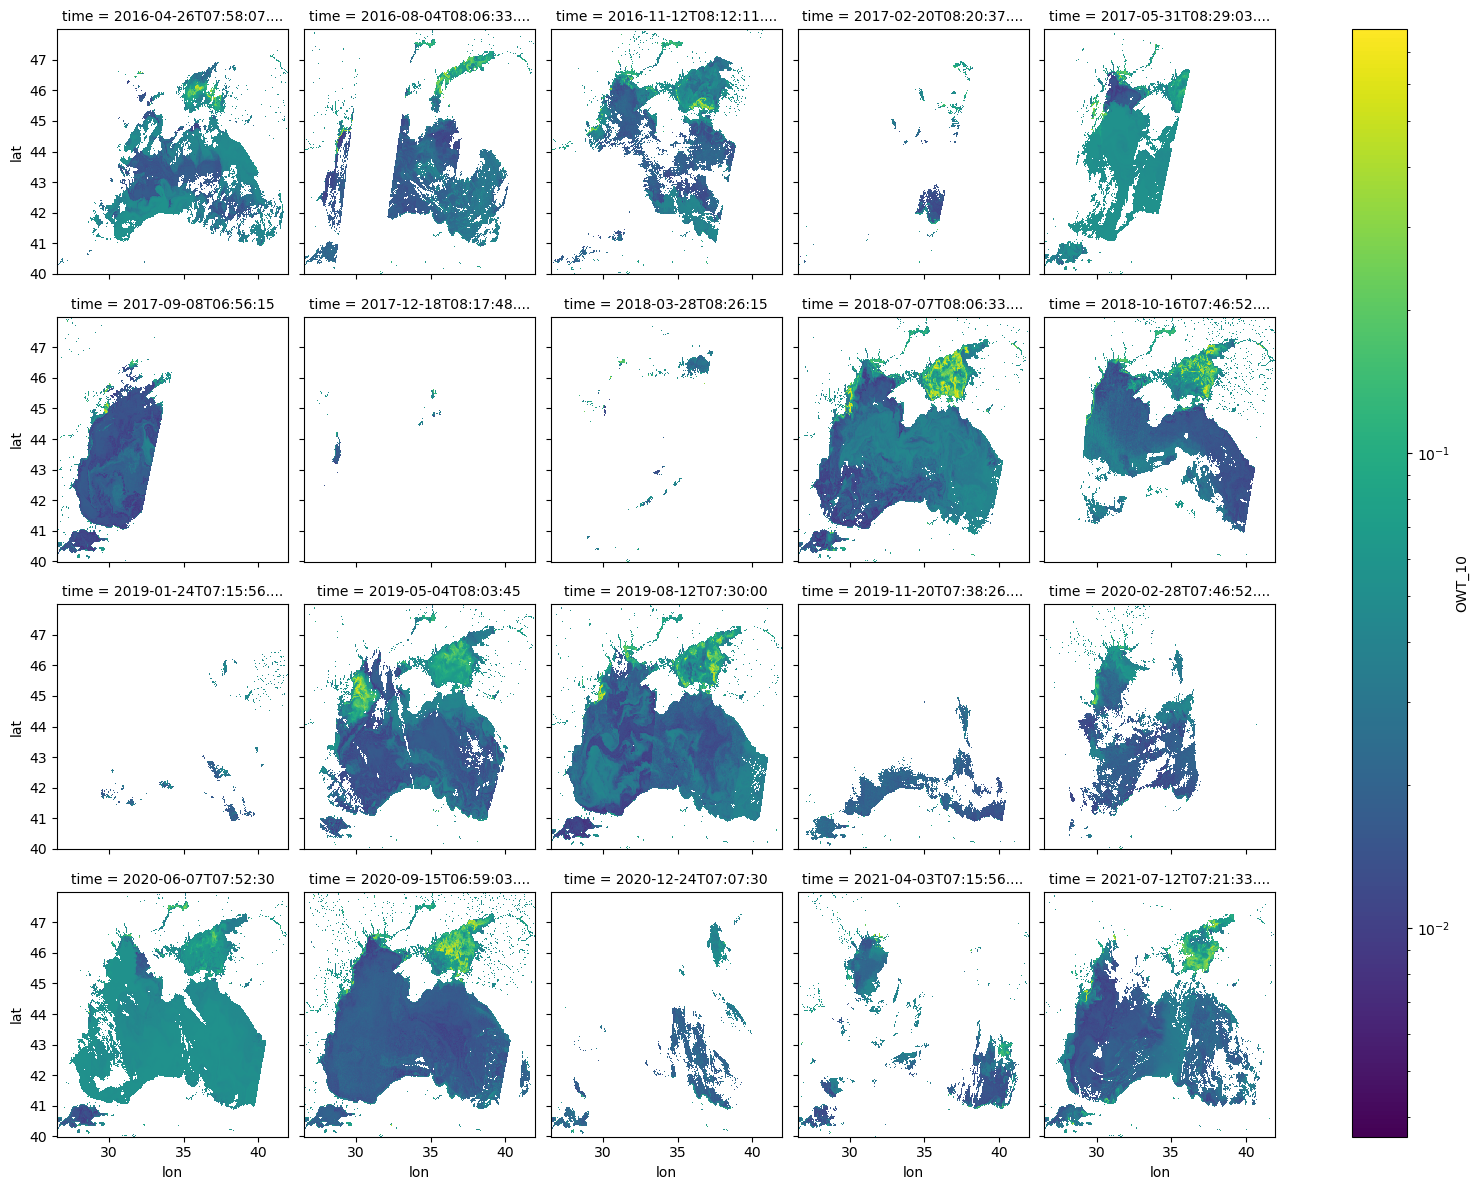

In [9]:
from matplotlib.colors import LogNorm
ds_owt.get_dataset(3).OWT_10.isel(time=slice(0, 1930, 100)).plot.imshow(col='time', col_wrap=5, norm=LogNorm())